In [1]:
import warnings
warnings.filterwarnings('ignore')

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [2]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 RandomForestClassifier，若為回歸問題，請使用 RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

from sklearn import linear_model



In [3]:
#from utilities import visualize_classifier
'''
ref: <<Artificial Intelligence with Python>>
     https://books.google.com.tw/books?id=O1AoDwAAQBAJ&pg=PA82&lpg=PA82&dq=visualize_classifier&source=bl&ots=ZkVgvo8B1S&sig=ACfU3U10eAI-5rrQ01TRfdZYNajqxNEWmQ&hl=zh-TW&sa=X&ved=2ahUKEwisnrf_krLgAhVFVrwKHUSLDCQQ6AEwC3oECAIQAQ#v=onepage&q=visualize_classifier&f=false

ref: https://github.com/PacktPublishing/Artificial-Intelligence-with-Python/blob/master/Chapter%2003/code/utilities.py
'''
def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

### Classification

In [4]:
'''
ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
# 讀取鳶尾花資料集
#iris = datasets.load_iris()
# 讀取資料集
wine = datasets.load_wine()

#dataset = iris
dataset = wine

class_names=dataset.target_names

df = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns= np.append(dataset['feature_names'], ['target']))

#df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#df_target = pd.DataFrame(dataset.target, columns=dataset.target)

print(df.head())

## 檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
print(df.shape)
print(df.info())
print(df.describe())
print(np.unique(df.target))

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=4)

# 建立模型
clf = RandomForestClassifier()
#clf = RandomForestClassifier(n_estimators=120,
#             criterion='gini',
#             max_features= None, 
#             max_depth = 14 )

print(clf)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

#print(clf.classes_)
#print(clf.feature_importances_)
#print(clf.max_features_)
#print(clf.n_classes_)
#print(clf.n_features_)
#print(clf.n_outputs_)
#print(clf.tree_)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [6]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)


Acuuracy:  1.0


Confusion matrix, without normalization
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


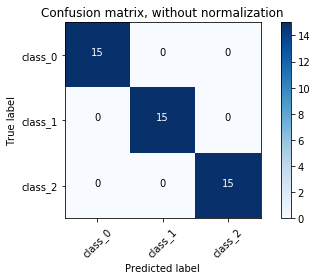

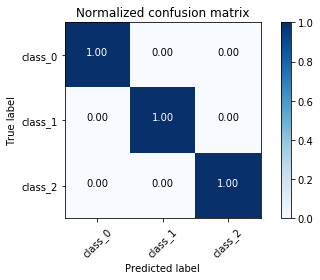

In [7]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [8]:
print("Feature importance: ")
dic = dict(zip(dataset.feature_names, clf.feature_importances_))
for x in sorted(dic.items(), key=lambda d: d[1], reverse=True):
    print(x)

Feature importance: 
('proline', 0.2736978085583651)
('hue', 0.18201030473007573)
('color_intensity', 0.1699744330929409)
('flavanoids', 0.15885789757944252)
('od280/od315_of_diluted_wines', 0.10164030645112912)
('alcohol', 0.05783821504623945)
('alcalinity_of_ash', 0.022848375967962672)
('magnesium', 0.015985118215428827)
('total_phenols', 0.008528106320561557)
('malic_acid', 0.0064876177188699)
('proanthocyanins', 0.0021318163189841728)
('ash', 0.0)
('nonflavanoid_phenols', 0.0)


In [9]:
'''
ref: https://ithelp.ithome.com.tw/articles/10206242?sc=rss.qu
'''
#visualize_classifier(clf, x_test, y_test)

# error: Number of features of the model must match the input. Model n_features is 13 and input n_features is 2 
# data only x, y 2 dimensions

print()

In [10]:
print(x_train.shape)

(133, 13)


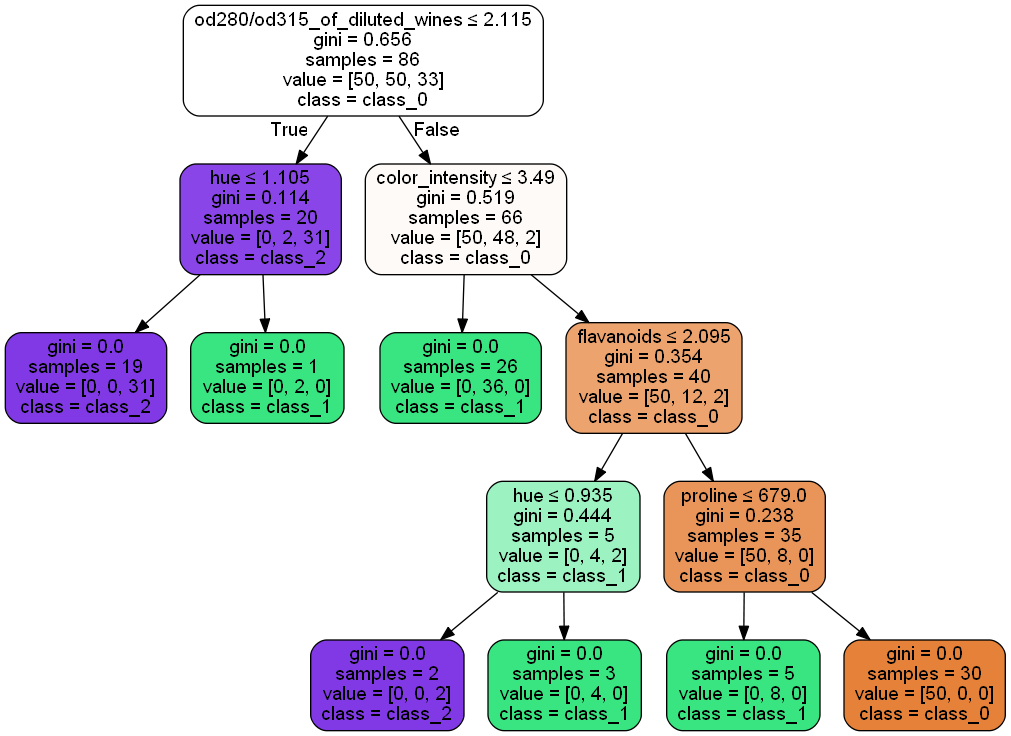

In [11]:
'''
ref: http://ywtail.github.io/2017/06/08/sklearn决策树可视化/
'''

'''
RandomForestClassifier 直接傳入不可行, 須傳入個別子決策樹 (RandomForestClassifier.estimators_[n])
This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

https://stackoverflow.com/questions/46192063/not-fitted-error-when-using-sklearns-graphviz
https://github.com/scikit-learn/scikit-learn/blob/ef5cb84a/sklearn/tree/export.py#L392

'''

import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz
from graphviz import Digraph

dot_data = export_graphviz(clf.estimators_[0], out_file=None, 
                         feature_names=dataset.feature_names,  
                         class_names=dataset.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())




### Classfication : ***change parameter*** 

[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [12]:
# 建立模型
clf = RandomForestClassifier(criterion='entropy')
print(clf)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Acuuracy:  0.9777777777777777


Confusion matrix, without normalization
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


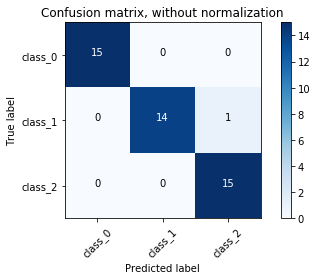

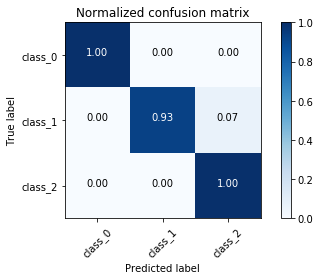

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [14]:
print("Feature importance: ")
dic = dict(zip(dataset.feature_names, clf.feature_importances_))
for x in sorted(dic.items(), key=lambda d: d[1], reverse=True):
    print(x)

Feature importance: 
('color_intensity', 0.18400643659409985)
('total_phenols', 0.14135780582152485)
('proline', 0.14015716463605862)
('flavanoids', 0.1304393974351745)
('alcohol', 0.1192168359315392)
('od280/od315_of_diluted_wines', 0.081088314257656)
('malic_acid', 0.051299064747132764)
('hue', 0.04566103854283411)
('alcalinity_of_ash', 0.03809141859016527)
('proanthocyanins', 0.033328908194035875)
('magnesium', 0.018047287016828905)
('ash', 0.010736792820676931)
('nonflavanoid_phenols', 0.0065695354122731475)


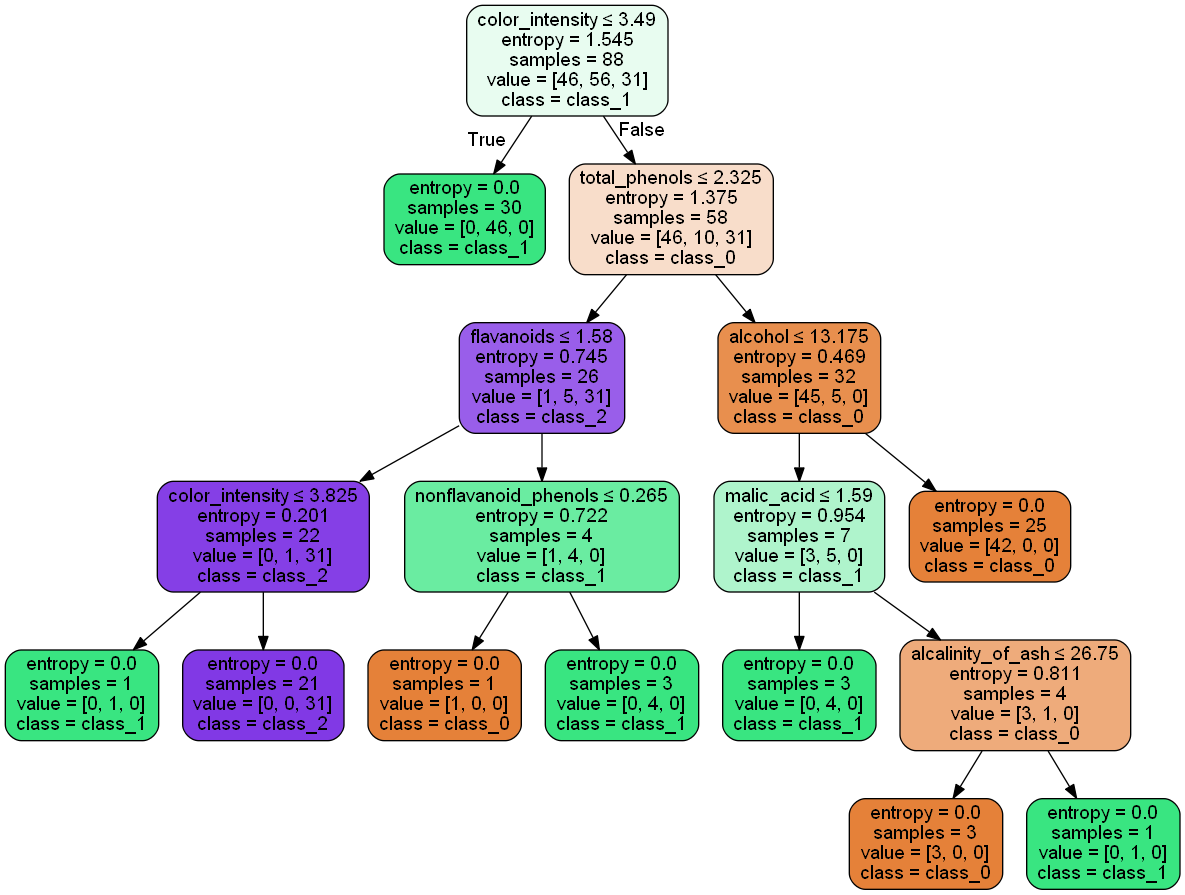

In [15]:
dot_data = export_graphviz(clf.estimators_[0], out_file=None, 
                         feature_names=dataset.feature_names,  
                         class_names=dataset.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [16]:
'''
ref: https://blog.csdn.net/weixin_40604987/article/details/79296427
'''

# Fit regression model
model0 = linear_model.LogisticRegression(solver='liblinear',multi_class='auto',random_state=4)
model1 = RandomForestClassifier(criterion='gini')
model2 = RandomForestClassifier(criterion='entropy')
model0.fit(x_train, y_train)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# Predict
y_pred_1 = model1.predict(x_test)
y_pred_2 = model2.predict(x_test)
 
print(f"Testing score(LogisticRegression):{model0.score(x_test,y_test)}")
print(f"Testing score(DecisionTreeClassifier(gini):{model1.score(x_test,y_test)}")
print(f"Testing score(DecisionTreeClassifier(entropy):{model2.score(x_test,y_test)}")


Testing score(LogisticRegression):0.9333333333333333
Testing score(DecisionTreeClassifier(gini):0.9777777777777777
Testing score(DecisionTreeClassifier(entropy):1.0


In [17]:
for depth in range(1, 10):
    rfc = RandomForestClassifier(max_depth=depth, n_estimators=50, criterion='gini', min_samples_leaf=5, min_samples_split=10)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)

    print(f"max_depth={depth}, Accuracy = {rfc.score(x_test, y_test)}")

max_depth=1, Accuracy = 0.9111111111111111
max_depth=2, Accuracy = 0.9777777777777777
max_depth=3, Accuracy = 0.9777777777777777
max_depth=4, Accuracy = 1.0
max_depth=5, Accuracy = 0.9777777777777777
max_depth=6, Accuracy = 1.0
max_depth=7, Accuracy = 0.9555555555555556
max_depth=8, Accuracy = 0.9777777777777777
max_depth=9, Accuracy = 0.9777777777777777


### Regression

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# 讀取資料集
boston = datasets.load_boston()

dataset = boston

df = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns= np.append(dataset['feature_names'], ['target']))

#print(df.head())

## 檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
print(df.shape)
print(df.info())
print(df.describe())

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=4)

# 建立模型
regr = RandomForestRegressor()
print(regr)

# 訓練模型
regr.fit(x_train, y_train)

# 預測測試集
y_pred = regr.predict(x_test)

print('-'*30)
print(f"Training score:{regr.score(x_train,y_train)}")
print(f"Testing score:{regr.score(x_test,y_test)}")
# 利用R^2, MSE評估模型預測結果
print(f'r2 score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')

#print(metrics.classification_report(y_pred, y_test))

print('-'*30)
print("Feature importance: ")
dic = dict(zip(dataset.feature_names, clf.feature_importances_))
for x in sorted(dic.items(), key=lambda d: d[1], reverse=True):
    print(x)

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000 

Text(0.5,1,'Decision Tree Regressor')

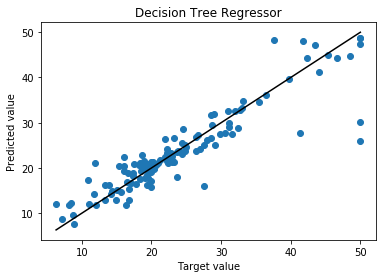

In [19]:
# 繪製圖形
plt.scatter(y_test, y_pred)
min_x = min_y = min(min(y_test),min(y_pred))
max_x = max_y = max(max(y_test),max(y_pred)) 
plt.plot([min_x, max_x], [min_y, max_y],'k')
plt.xlabel('Target value')
plt.ylabel('Predicted value')
plt.title('Decision Tree Regressor')

In [20]:
from sklearn import linear_model

'''
ref: https://blog.csdn.net/weixin_40604987/article/details/79296427
'''

# Fit regression model
model0 = linear_model.LinearRegression()
model1 = RandomForestRegressor()
model2 = RandomForestRegressor(criterion="mse")
model3 = RandomForestRegressor(criterion="mae")
model4 = RandomForestRegressor(max_depth=1)
model5 = RandomForestRegressor(max_depth=3)
model0.fit(x_train, y_train)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)

# Predict
y_pred_1 = model1.predict(x_test)
y_pred_2 = model2.predict(x_test)
y_pred_3 = model3.predict(x_test)
 
print(f"Testing score(LinearRegression):{model0.score(x_test,y_test)}")
print(f"Testing score(model1):{model1.score(x_test,y_test)}")
print(f"Testing score(model2):{model2.score(x_test,y_test)}")
print(f"Testing score(model3):{model3.score(x_test,y_test)}")
print(f"Testing score(model4):{model4.score(x_test,y_test)}")
print(f"Testing score(model5):{model5.score(x_test,y_test)}")

print(f"LinearRegression={model0}")
print(f"model1={model1}")
print(f"model2={model2}")
print(f"model3={model3}")
print(f"model4={model4}")
print(f"model5={model4}")

Testing score(LinearRegression):0.7313816523148399
Testing score(model1):0.8391680442305818
Testing score(model2):0.8472658156896044
Testing score(model3):0.8124978698672446
Testing score(model4):0.5539120118028094
Testing score(model5):0.7876254066627975
LinearRegression=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
model1=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,

[Ensemble Method](https://scikit-learn.org/stable/modules/ensemble.html#forest) <br>
[](https://ithelp.ithome.com.tw/articles/10206242?sc=rss.qu)